## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [16]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from sklearn import model_selection
from scipy.ndimage.interpolation import rotate
from sklearn.metrics import confusion_matrix
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [3]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). The helper function 'show_data()' visualizes each given observation.

In [25]:
def show_data(X, Y, n, angle=0):
    image_matrix = X[n,:].reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    print(Y[n])

3


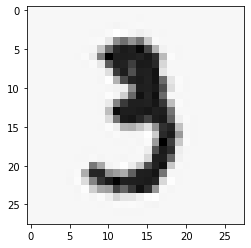

In [5]:
# Example 1.
show_data(X_train, Y_train,10,+10)

3


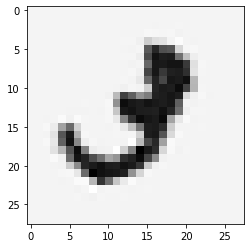

In [6]:
# Example 2.
show_data(X_train, Y_train,10,-30)

1


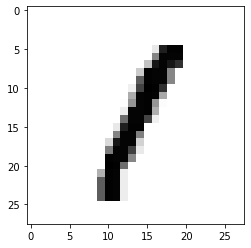

In [7]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [23]:
# <Your code goes in here>
#Grid search
n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
RandomForestClassifier(n_estimators=10, max_depth=3)
RandomForestClassifier(n_estimators=10, max_depth=10)
RandomForestClassifier(n_estimators=10, max_depth=20)
RandomForestClassifier(n_estimators=10, max_depth=40)

RandomForestClassifier(n_estimators=50, max_depth=3)
RandomForestClassifier(n_estimators=50, max_depth=10)
RandomForestClassifier(n_estimators=50, max_depth=20)
RandomForestClassifier(n_estimators=50, max_depth=40)

RandomForestClassifier(n_estimators=100, max_depth=3)
RandomForestClassifier(n_estimators=100, max_depth=10)
RandomForestClassifier(n_estimators=100, max_depth=20)
RandomForestClassifier(n_estimators=100, max_depth=40)

RandomForestClassifier(n_estimators=200, max_depth=3)
RandomForestClassifier(n_estimators=200, max_depth=10)
RandomForestClassifier(n_estimators=200, max_depth=20)
RandomForestClassifier(n_estimators=200, max_depth=40)
array1 = data_test.values
array2=data_train.values
X = array[:,0:8]
Y = array2[:,8]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
#pyplot.show()


Accuracy: nan (nan)


Accurracy is not enough


3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

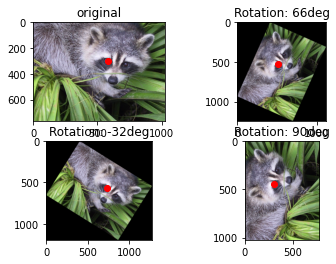

In [27]:
# <Your code goes in here>
from scipy import misc
from scipy.ndimage import rotate
data_orig = misc.face()
data_rot = rotate(data_orig,66) 
x0,y0 = 580,300 # 
data_orig = misc.face()
x0,y0 = 580,300 # left eye; (xrot,yrot) should point there

def rot(image, xy, angle):
    im_rot = rotate(image,angle) 
    org_center = (np.array(image.shape[:2][::-1])-1)/2.
    rot_center = (np.array(im_rot.shape[:2][::-1])-1)/2.
    org = xy-org_center
    a = np.deg2rad(angle)
    new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
            -org[0]*np.sin(a) + org[1]*np.cos(a) ])
    return im_rot, new+rot_center


fig,axes = plt.subplots(2,2)

axes[0,0].imshow(data_orig)
axes[0,0].scatter(x0,y0,c="r" )
axes[0,0].set_title("original")

for i, angle in enumerate([66,-32,90]):
    data_rot, (x1,y1) = rot(data_orig, np.array([x0,y0]), angle)
    axes.flatten()[i+1].imshow(data_rot)
    axes.flatten()[i+1].scatter(x1,y1,c="r" )
    axes.flatten()[i+1].set_title("Rotation: {}deg".format(angle))

plt.show()

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [ ]:
       # <Your code goes in here>

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [ ]:
       # <Your code goes in here>